In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and inspect data
df = pd.read_csv('../data/tiktok_synthetic_data.csv')
print(df.head())

In [4]:
# Define engagement: any of liked/shared/commented > 0 means engaged
df['engagement'] = df[['liked', 'shared', 'commented']].sum(axis=1)
df['engaged'] = (df['engagement'] > 0).astype(int)

In [5]:
engagement_rates = df.groupby('group')['engaged'].mean().reset_index()
print("\nEngagement rates by group:")
print(engagement_rates)


Engagement rates by group:
     group   engaged
0  control  0.731794
1  variant  0.744363


In [6]:
# Calculate counts for stats test
count_control = df[df['group'] == 'control']['engaged'].sum()
n_control = df[df['group'] == 'control'].shape[0]

In [7]:
count_variant = df[df['group'] == 'variant']['engaged'].sum()
n_variant = df[df['group'] == 'variant'].shape[0]

In [8]:
# Two-proportion z-test function
def two_proportion_z_test(count1, nobs1, count2, nobs2):
    p1 = count1 / nobs1
    p2 = count2 / nobs2
    p_pool = (count1 + count2) / (nobs1 + nobs2)
    numerator = p1 - p2
    denominator = np.sqrt(p_pool * (1 - p_pool) * (1/nobs1 + 1/nobs2))
    z = numerator / denominator
    p_value = 2 * (1 - norm.cdf(abs(z)))
    return z, p_value

In [9]:
z_stat, p_val = two_proportion_z_test(count_control, n_control, count_variant, n_variant)

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")


Z-statistic: -3.1961
P-value: 0.0014


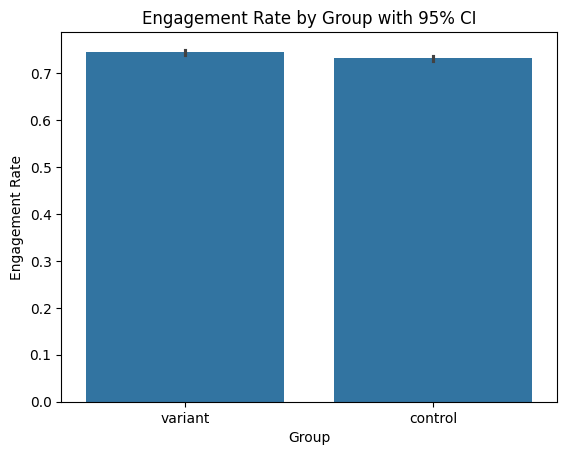

In [12]:
sns.barplot(x='group', y='engaged', data=df, errorbar=('ci', 95))
plt.title('Engagement Rate by Group with 95% CI')
plt.ylabel('Engagement Rate')
plt.xlabel('Group')
plt.show()

In [13]:
# Business recommendation
if p_val < 0.05:
    print("Statistically significant increase in engagement for variant group → Recommend rollout!")
else:
    print("No statistically significant difference → Further testing needed.")

Statistically significant increase in engagement for variant group → Recommend rollout!
